###Setting it all up!!


In [2]:
pip install gspread-dataframe

In [ ]:
#dont  need to install rigth now
'''
pip install feature_engine
'''

'\npip install feature_engine\n'

In [3]:
# @title Authentication with google
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
# With this code, Colab gives you a link: by clicking on it you will access your Google account and will be asked to copy a code and to paste it in the ‘Enter verification code’ box; just like that:

In [4]:
# @title  IMPORT THESE FIRST: Scikitlearn ....
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.datasets import (make_classification, make_blobs, load_breast_cancer, make_regression, make_friedman1,
                              load_iris)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
# from feature_engine.creation import CyclicalFeatures

'''
from data.adspy_shared_utilities import (load_crime_dataset, plot_two_class_knn,
                                         plot_class_regions_for_classifier_subplot,
                                         plot_class_regions_for_classifier,
                                         plot_feature_importances)
                                         '''

'\nfrom data.adspy_shared_utilities import (load_crime_dataset, plot_two_class_knn,\n                                         plot_class_regions_for_classifier_subplot,\n                                         plot_class_regions_for_classifier,\n                                         plot_feature_importances)\n                                         '

In [5]:
# @title defining my worksheet
worksheet = gc.open('newspaper_data_all').sheet1
#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#Convert to a DataFrame
df = pd.DataFrame(rows)

pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
pd.set_option('display.max_colwidth', None) # show the whole column when looking at dataframe
pd.set_option('display.max_rows', None)

In [6]:
# @title creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]

###  converting to different dtypes:

In [7]:
# @title datetime stuff
from datetime import datetime
df['event_date'] = pd.to_datetime(df['event_date'])
df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day
df['year'] = df['event_date'].dt.year
df['month_day'] = df['month'].astype(str) + '.' + df['day'].astype(str)

In [8]:
# @title making crowdsize usable -> numeric
df['crowd_size'] = df['crowd_size'].replace(
    to_replace=[','],
    value='',
    regex=True )

df['crowd_size'] = pd.to_numeric(df['crowd_size'])
df['crowd_size_class'] = pd.to_numeric(df['crowd_size_class'])
df['month_day'] = pd.to_numeric(df['month_day'])
df['district_class'] = pd.to_numeric(df['district_class'])
print(df.dtypes)

0
event_date            datetime64[ns]
year                           int32
month                          int32
day                            int32
month_day                    float64
weekday                       object
event_type                    object
mood                          object
actor1                        object
assoc_actor_1                 object
inter1                        object
actor2                        object
assoc_actor_2                 object
inter2                        object
civilian_targeting            object
district                      object
district_class                 int64
latitude                      object
longitude                     object
source                        object
label                         object
category                      object
category_class                object
class                         object
class_class                   object
title                         object
notes11                       object

### sorting and checking matplotlib:

## Encoding

In [ ]:
# @title not working jet currently using other way
'''
cyclical = CyclicalFeatures(variables=None, drop_original=True)

X = cyclical.fit_transform(df['event_date'])
print(X.head())
# TypeError: X must be a numpy array or pandas dataframe. Got <class 'pandas.core.series.Series'> instead.
'''

## KNN + Regression

In [27]:
np.set_printoptions(precision=2)


feature_names_crowds = ['month_day', 'class_class', 'district_class']
X_crowds = df[feature_names_crowds]
y_crowds = df['crowd_size_class']
target_names_crowds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

X_crowds_2d = df[['event_date', 'class_class']]
y_crowds_2d = df['crowd_size_class']

X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, test_size=0.3, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scaled, y_train) # when fitted it stops the eleven
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_crowd1 = [[5.1, 1.1, 5]]
example_crowd2 = [[2.15, 2.3, 1]]
example_crowd_scaled1 = scaler.transform(example_crowd1)
print('Predicted crowd size for ', example_crowd1, ' is ',
          target_names_crowds[knn.predict(example_crowd_scaled1)[0]-1])

example_crowd_scaled2 = scaler.transform(example_crowd2)
print('Predicted crowd size for ', example_crowd2, ' is ',
          target_names_crowds[knn.predict(example_crowd_scaled2)[0]-1])


Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.36
Predicted crowd size for  [[5.1, 1.1, 5]]  is  9
Predicted crowd size for  [[2.15, 2.3, 1]]  is  3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [22]:
# @title ?????.....
'''
clf = KNeighborsClassifier(n_neighbors = 5)
X = X_crowds.to_numpy()
y = X_crowds.to_numpy()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))
'''

"\nclf = KNeighborsClassifier(n_neighbors = 5)\nX = X_crowds.to_numpy()\ny = X_crowds.to_numpy()\ncv_scores = cross_val_score(clf, X, y)\n\nprint('Cross-validation scores (3-fold):', cv_scores)\nprint('Mean cross-validation score (3-fold): {:.3f}'\n     .format(np.mean(cv_scores)))\n"

In [ ]:
# @title runs training set amazing but test set very bad result like: -0.687 and 0.065
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, random_state = 0)
# trained and fitted at the same time
knnreg = KNeighborsRegressor(n_neighbors = 1).fit(X_train, y_train)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)


'''
example_crowd = [[5.1, 1.1, 5]]
example_crowd_scaled = scaler.transform(example_crowd)
print('Predicted crowd size for ', example_crowd, ' is ',
          target_names_crowds[knnreg.predict(example_crowd_scaled)[0]-1])
'''
print(knnreg.predict(X_test))
print('R-squared train score: {:.3f}'
     .format(knnreg.score(X_train, y_train)))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 1.  3.  6.  9.  3.  8.  3.  9.  5.  1.  2.  4.  3.  3.  3.  1.  3.  6.
  3.  3.  3.  3.  4.  3.  3.  4.  5.  4.  3.  4.  4. 11.  6.  4.  6.  3.
  1.  1.  1.  3.  3.  3.  3.  9.  6.  9.  3.  2.  3.  3.  3.  6.  3.  4.
  3.  1.  9.  4.  2.  4.  1. 10.  3.  3.  3.  2.  1.  3.  4.  1.  3.  4.
  6.  6.  3.  8.  1.  3.  3.  3.  8.  3.  9.  3.  3.  3.  9.  9.  1.  1.
  6.  9.  3.  3.  1.  6.  5.  8.  3.  8.  3.  1.  3.  3.  3.  7.  6.  3.
  5.  5.  6.  5.  3.  3.  3.  3.  8.  3.  9.  2.  3.  4.  3.  4.  2.  6.
  3.  3.  1.  2.  3.  6.  3.  2.  6.  7.  6.  3.  1.  3.  1.  1.  5.  5.
  3.  2.  3.  4.  7.  4.  5.  9.  4.  9.  4.  6.  6.  3.  6.  3.  3.  3.
  5.  6.  5.  7.  6.  1.  3.  3.  3.  1.  3.  6.  5.  4.  3.  3.  1.  1.
  1.  5.  6.  5.  3.  3.  5.  7.  3.  8.  3.  3.  3.  7.  3.  1.  4.  3.
  3.  8.  1.  3.  3.  9.  3.  5.  5.  7.  4.  1.  3.  3.  1.  3.  5.  3.
  1.  1.  5.  3.  4.  5.  3.  7.  3.  3.  1.  3.  3.  3.  3.  5.  1.  3.
  6.  6.  2.  8.  5.  3.  3.  7.  4.  3.  3.  3.  6

## Irem and my code mixed pretty  highr results in test & training

In [10]:
#@title Irems version Logisitc regression -> 0.51 in test set
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, test_size=0.2, random_state=60)
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Train the model
model.fit(X_train, y_train)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)


print('Accuracy of Model classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Model classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

example_crowd = [[5.1, 1.1, 5]]
example_crowd_scaled = scaler.transform(example_crowd)
print('Predicted crowd size for ', example_crowd, ' is ',
          target_names_crowds[model.predict(example_crowd_scaled)[0]-1])

print(model.predict(X_test))

Accuracy of Model classifier on training set: 0.42
Accuracy of Model classifier on test set: 0.51
Predicted crowd size for  [[5.1, 1.1, 5]]  is  3
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## multiple methods low to similar results


In [ ]:
# @title LINEAR REGRESSION not usable
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds,
                                                   random_state = 50)
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.predict(X_test))
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

In [ ]:
# @title LINREG  very very  low results
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, test_size=0.1,
                                                   random_state = 50)
linreg = LinearRegression().fit(X_train, y_train)
'''
example_crowd = [[5.1, 1.1, 5]]
example_crowd_scaled = scaler.transform(example_crowd)
print('Predicted crowd size for ', example_crowd, ' is ',
          target_names_crowds[linreg.predict(example_crowd_scaled)[0]-1])
'''
print('Protest dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

In [ ]:
# @title LINRIDGE result dont make sense and very low
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
'''
example_crowd = [[5.1, 1.1, 5]]
example_crowd_scaled = scaler.transform(example_crowd)
print('Predicted crowd size for ', example_crowd, ' is ',
          target_names_crowds[linridge.predict(example_crowd_scaled)[0]-1])
'''
print(linridge.predict(X_test))

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

In [ ]:
# @title Alpha variations ....
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

In [ ]:
# @title LASSO  no real results that should be coming here:  low results
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Protest dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crowds), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

In [ ]:
# @title Lasso with different alpha not  helping at all !!!!!!
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)

    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

In [ ]:
# @title Lineaer Regression polynomiinal --- not helping
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_crowds_poly = poly.fit_transform(X_crowds)

X_train, X_test, y_train, y_test = train_test_split(X_crowds_poly, y_crowds ,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_crowds_poly, y_crowds,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

## better results !!!!

In [15]:
# @title LogisticRegression(solver='liblinear') now normal one time 0.85 results how ????
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, test_size=0.9, random_state = 70)

clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('Protest dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Protest dataset
Accuracy of Logistic regression classifier on training set: 0.57
Accuracy of Logistic regression classifier on test set: 0.42


In [ ]:
# @title SVC(kernel='linear') now normal results one time 0.85 results how ????
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, random_state = 0)

clf = SVC(kernel='linear').fit(X_train, y_train)
print('Protest dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Protest dataset
Accuracy of Linear SVC classifier on training set: 0.43
Accuracy of Linear SVC classifier on test set: 0.48


In [ ]:
# @title part of SVC does not make sense
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, random_state = 0)

clf = SVC(kernel='linear', C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

In [ ]:
# @title SVC(C=10)scaled results --> normal
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.44
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.47


In [ ]:
# @title SVC(C=10) unnormalized -> normal relsults
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Protest dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Protest dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.44
Accuracy of RBF-kernel SVC on test set: 0.48


## Decision Tree .... forest

In [ ]:
# @title decision tree version 1

X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, test_size=0.2, random_state = 60)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on test set: 0.40


In [ ]:
# @title decision tree version 2
clf2 = DecisionTreeClassifier(max_depth = 35).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on test set: 0.41


In [ ]:
# @title  importing random forest
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# @title  Irem Version 2 RANDOM FOREST same results as desion tree
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, test_size=0.1, random_state=45)
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=40)
# Train the model\n",
model= clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy: 0.3333333333333333
Accuracy of Decision Tree classifier on training set: 0.93
Accuracy of Decision Tree classifier on test set: 0.33


## Validation

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 5)
X = X_crowds.to_numpy()
y = y_crowds.to_numpy()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.3  0.31 0.3  0.32 0.3 ]
Mean cross-validation score (3-fold): 0.305


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [ ]:
print(train_scores)

[[0.44 0.44 0.44]
 [0.45 0.46 0.45]
 [0.66 0.68 0.65]
 [0.85 0.85 0.83]]


In [ ]:
print(test_scores)

[[0.44 0.44 0.44]
 [0.44 0.42 0.44]
 [0.36 0.37 0.4 ]
 [0.43 0.42 0.43]]


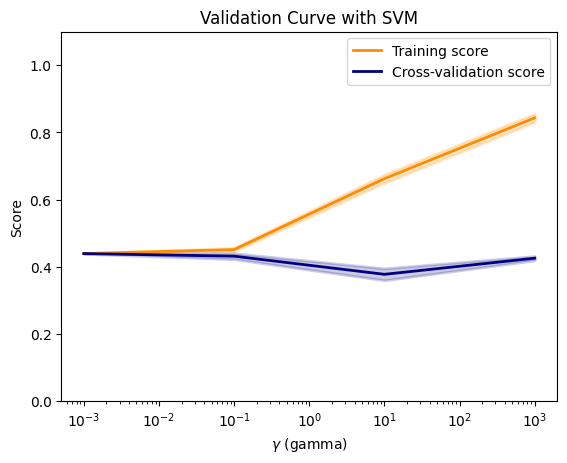

In [ ]:
# This code based on scikit-learn validation_plot example
# See: http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## saving it sheets

In [ ]:
#ONLY RUN WHEN 100% SURE YOU WANNA CHANGE SHARED DATA SET !!!
from gspread_dataframe import set_with_dataframe
set_with_dataframe(worksheet, df)


## csv

In [ ]:

# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
%cd drive/MyDrive/FindMyProtest/Data

In [ ]:
df.to_csv('newspaper.csv', sep= '\t')

In [ ]:
'''
import pandas as pd
df = pd.read_csv("newspaper24.03.csv",  on_bad_lines='warn')
df.head()
'''

## json

In [ ]:

# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/FindMyProtest/Data

/content/drive/MyDrive/FindMyProtest/Data


In [ ]:
df.to_json('WDnewspaper.json')


In [ ]:
df24.to_json('newspaper24.json')
df23.to_json('newspaper23.json')
df22.to_json('newspaper22.json')
df21.to_json('newspaper21.json')
